# Coherence time of qubits

## Coherence

**What is coherence?**

In quantum mechanics, the systems (or particles) can be described by a wavefunction, which is the mathematical representation to the quantum states. 
It is said that the system is **coherent** when a definite phase relation between different states exists.
If the system is perfectly isolated, having no interaction with the reservior, it would maintain the coherence forever.
However, this would not absolutely happen since the quantum computers cannot be cooled down to zero temperature, neither locate at a place without any signal disturbance. Moreover, we will do the measurement after a series of operations, meaning that the coherence is shared with the environment and lost in time.

In [2]:
# prerequisite
from qiskit import IBMQ, QuantumCircuit, Aer, execute
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_histogram
from qiskit.tools.jupyter import *

apitoken = 'c19e2bcf0e6eb22d33dafe16d433fea46c9f1c2fd61904a781aef17f7c548be2c9136c973f24a1633cc12b5e9343e1fb066168999ba0d0f8e3144147165fe9a8'
try :
    IBMQ.enable_account(token=apitoken)
except:
    pass
provider = IBMQ.get_provider(project='default')

A circuit is designed to test the coherence time of a five-qubit quantum computer as below. The argument $n$ is the number of qubits while $m$ is the number of timesteps for waiting. After $m$ timesteps, we apply a measurement to get the resultant state. 

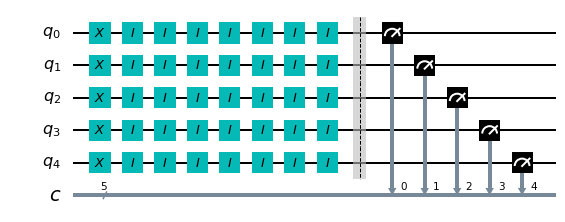

In [7]:
n = 5 # number of qubits
m = 7 # number of timesteps
circ = QuantumCircuit(n,n)

for i in range(n):
    circ.x(i)
    for j in range(m):
        circ.id(i)
circ.barrier()
circ.measure(range(n), range(n))

circ.draw('mpl', scale=0.5)        

It is $100\%$ for sure that if we do the measurement on a simulator, the outcome will be all $\left|0\right>$s, due to the fact that the simulator is an *ideal* system. To convince you, we do a simple test:

{'11111': 1024}


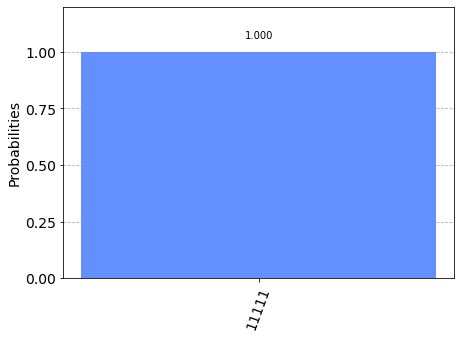

In [3]:
# execute the circuit
shots = 1024
simulator = Aer.get_backend('qasm_simulator')
job = execute(circ, backend=simulator, shots=shots)
counts = job.result().get_counts(circ)
# print out results
print(counts)
plot_histogram(counts)

On the real device, the effects of noise and other complicated mecnanism are included, and the outcome will no longer so perfect. In the below cell, we test the quantum circuit on a real device. One can try with different $m$.

backend:  ibmqx2
{'11101': 49, '10111': 21, '11001': 2, '01011': 1, '01100': 1, '10101': 1, '11010': 3, '11011': 52, '11100': 4, '11111': 779, '01111': 46, '10100': 1, '11110': 57, '01010': 1, '01110': 6}


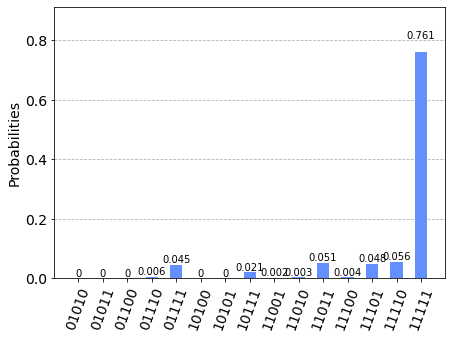

In [4]:
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n and 
                                       not x.configuration().simulator and x.status().operational==True))
print('backend: ', backend)

job = execute(circ, backend=backend, shots=shots)
counts = job.result().get_counts(circ)
# print out results
print(counts)
plot_histogram(counts)

One thing to be noticed is that though coherence of individuals can be measured, the coherence of all qubits combined together is lower. This is because the single-qubit decoherence decoheres the entire quantum computer. This should be taken into account when discussing the behavior of a many-qubit quantum computer, since the operations usually contain multi-qubit gates.

### Compare two different timesteps

backend:  ibmq_vigo
counts of 1 timesteps=  {'10110': 6, '11101': 18, '10111': 36, '10101': 2, '11010': 2, '11011': 25, '11100': 2, '10011': 3, '10001': 1, '11111': 825, '01111': 39, '11110': 56, '01110': 3, '00111': 6}
counts of 100 timesteps=  {'11101': 36, '11001': 3, '10101': 14, '11010': 9, '11111': 612, '10011': 10, '01010': 2, '01110': 6, '00110': 2, '01101': 5, '00111': 12, '10110': 25, '00011': 1, '10111': 119, '01011': 2, '11011': 50, '11100': 4, '01111': 41, '01001': 1, '11110': 69, '00101': 1}


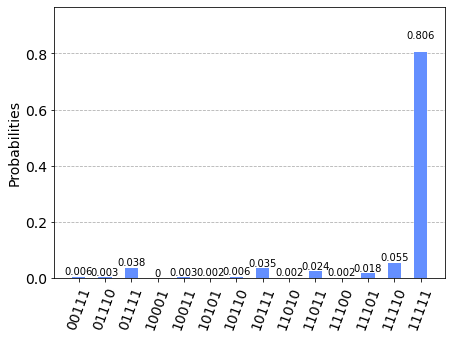

In [23]:
n = 5 
circ1 = QuantumCircuit(n,n)
circ2 = QuantumCircuit(n,n)

m1 = 1
m2 = 100

# quantum circuits
for i in range(n):
    circ1.x(i)
    for j in range(m1):
        circ1.id(i)
circ1.measure(range(n), range(n))
for i in range(n):
    circ2.x(i)
    for j in range(m2):
        circ2.id(i)
circ2.measure(range(n), range(n))

# execute
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n and 
                                       not x.configuration().simulator and x.status().operational==True))
print('backend: ', backend)
job1 = execute(circ1, backend=backend, shots=shots)
counts1 = job1.result().get_counts(circ1)
job2 = execute(circ2, backend=backend, shots=shots)
counts2 = job2.result().get_counts(circ2)
# print out results
print(f'counts of {m1} timesteps= ', counts1)
print(f'counts of {m2} timesteps= ', counts2)
plot_histogram(counts1)

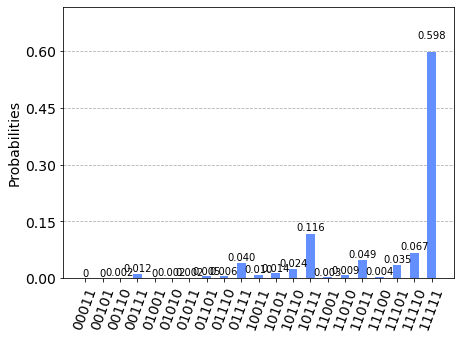

In [26]:
plot_histogram(counts2)

In the single-qubit test, we choose a NOT gate in order to initialize the qubit at the excited state $\left|1\right>$. The concept is to measure the probability of staying at that higher-energy level of each qubit. The longer the waiting, the shorter the lives. 

## Two-qubit system Decoherence Time

Next we move to the two-qubit case. The methodology is similar to the previous one, but mixing the subsystem together. We would like to study the two-qubit maximally entangled state, which is also an important part of quantum algorithms achieving the exponentially spped-up over the classical ones.
In the following circuit, we create the state
$$
\dfrac{1}{\sqrt{2}}
\left(
\left|10\right>
+
\left|01\right>
\right)
$$
by the combination of a Hadamard gate, a NOT gate and a CNOT gate.

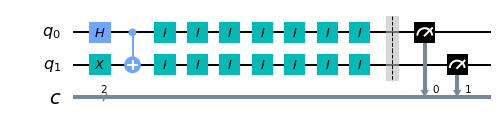

In [12]:
m = 7 # number of timesteps
circ = QuantumCircuit(2,2)

circ.h(0)
circ.x(1)
circ.cx(0,1)
for i in range(2):
    for j in range(m):
        circ.id(i)
circ.barrier()
circ.measure(range(2), range(2))

circ.draw('mpl', scale=0.5)  

Then we run the experiment on a real device.

backend:  ibmq_valencia
{'11': 4, '01': 476, '10': 475, '00': 69}


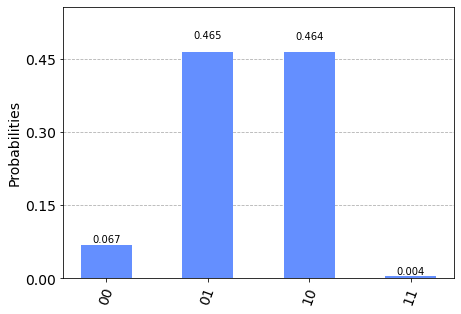

In [13]:
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 5 and 
                                       not x.configuration().simulator and x.status().operational==True))
print('backend: ', backend)

shots = 1024
job = execute(circ, backend=backend, shots=shots)
counts = job.result().get_counts(circ)
# print out results
print(counts)
plot_histogram(counts)

This special state is one of the so-called **Bell states**. When two individuals, Alice and Bob, are very far distance from each other and have each been given one qubit of the entangled state, such as the state we used here, they can communicate two bits of classical information by only sending one qubit.

Let's get down to business.
It is clear that the state $\left|00\right>$ results from the dissipassion of the system, while $\left|11\right>$ may come from some noise such as heat fluctuations, charge or flux noise that accidentally excite the qubits. 
The outcome includes the classical readout errors of the system.

In [14]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright

# Exercise

**Design a circuit to test the coherence of a five-qubit quantum computer.**